In [1]:
import pandas as pd 

df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k', axis='columns')         # inputs var. drop salary column (or crated new df inputs)
target = df['salary_more_then_100k']                           # target var. has salary column (or crated new df target)

In [5]:
# Now we use LabelEncoder to convert text into numbers

from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()         # 3 columns reqd. 3 objects
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [9]:
# Now we create new columns for label Encoder

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [12]:
# Now after creating LabelEncoder, we drop columns not reqd. , also create new df for that

inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n.head()       # google: 2  , abc pharma: 0 , facebook: 1 

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


#### Now we train classifier

In [14]:
from sklearn import tree

In [15]:
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(inputs_n,target)   # we can also split data into train_test , not did here to keep simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
model.score(inputs_n, target)

1.0

In [18]:
model.predict([[2,0,0]])     # salary : 0,1 

array([1], dtype=int64)

## ------------------------------------------------------------------------------------------

## Case 2 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')         # kyphosis - is a back bone disease
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


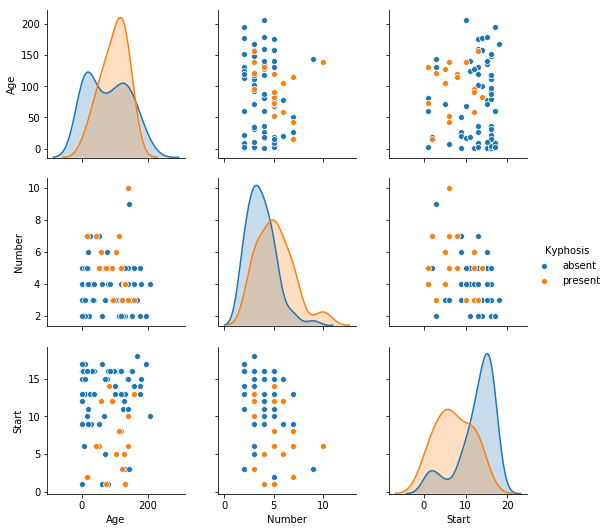

In [3]:
sns.pairplot(df, hue='Kyphosis')    # hue : is output parameter , so my scattered point will highlighted based on kyphosis o/p.

In [4]:
from sklearn.model_selection import train_test_split             # train test data

X = df.drop('Kyphosis', axis=1)    # dropping 'kyphosis' column from X     (independent feature)
y = df['Kyphosis']                 # and taking into y  for output column  (dependent feature)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
from sklearn.tree import DecisionTreeClassifier               # Implementing Decision Tree Classifier  (creating model)

dtree = DecisionTreeClassifier(criterion='entropy')

dtree.fit(X_train, y_train)             # fitting data

predictions = dtree.predict(X_test)      # prediction

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

conf_mat = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)

print('Confusion matrix :', conf_mat)
print(f'Accuracy is : {acc:.2%}')

Confusion matrix : [[15  2]
 [ 7  1]]
Accuracy is : 64.00%


In [8]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.88      0.77        17
     present       0.33      0.12      0.18         8

   micro avg       0.64      0.64      0.64        25
   macro avg       0.51      0.50      0.48        25
weighted avg       0.57      0.64      0.58        25



## Tree Visualization

In [9]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz    # responsible for creatng Decision Tree
import pydot

In [10]:
features = list(df.columns[1:])       # 1st creating list of features data , excluding - dependent feature 
features   # all are now independent features

['Age', 'Number', 'Start']

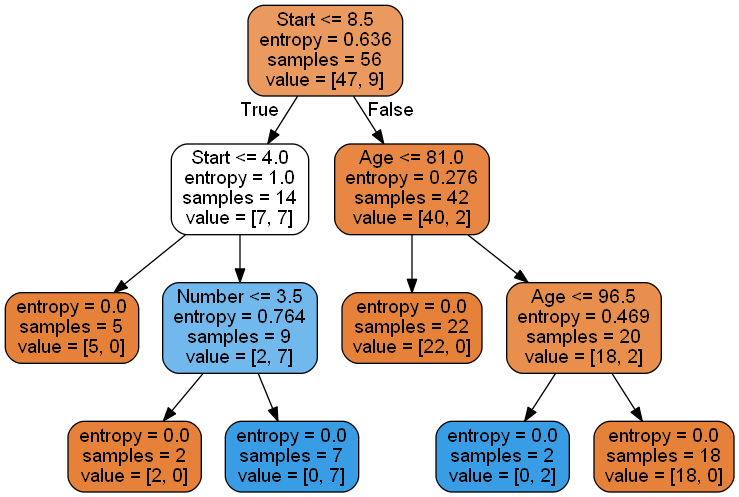

In [11]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
# dtree : Decision Tree model created , out_file : where we displaying object , features_names : features dataset , 
# filled=True : every block filled with unique color , rounded=True : makes boxes round from the corner

graph = pydot.graph_from_dot_data(dot_data.getvalue())      # Here we are getting dot_data value in graph
Image(graph[0].create_png())   # then this graph will be saved in Image , by using Image library , creating png file

Pruning helps us to avoid overfitting , we can avoid by changing parameters like : 
    -max_leaf_nodes,
    -min_samples_leaf,
    -max_depth.